In [1]:
#### S3

import boto3
import pandas as pd
# import os
file = pd.read_json("credentials.json")
aws_access_key_id =file["data_sources"]["s3"]["creds"]["aws_access_key_id"]
aws_secret_access_key =file["data_sources"]["s3"]["creds"]["aws_secret_access_key"]
Bucket =file["data_sources"]["s3"]["bucket"]
Key=file["data_sources"]["s3"]["folder_path"]
s3_client = boto3.client(
    's3',
    aws_access_key_id =aws_access_key_id ,
    aws_secret_access_key =  aws_secret_access_key )
response = s3_client.get_object(Bucket=Bucket, Key=Key)
# print(response)
Tournament_Won = pd.read_csv(response.get("Body"),header=3)
print(Tournament_Won)

       ATP       Winner  WRank    WPts   W1   W2   W3  W4  W5  Wsets  B365W  \
0        1    Kwon S.W.   53.0  1115.0  6.0  6.0  NaN NaN NaN    2.0   1.61   
1        1  Monteiro T.   89.0   805.0  6.0  3.0  7.0 NaN NaN    2.0   2.30   
2        1     Djere L.   52.0  1131.0  7.0  7.0  NaN NaN NaN    2.0   1.66   
3        1   Johnson S.   85.0   812.0  6.0  2.0  6.0 NaN NaN    2.0   2.00   
4        1    Moutet C.   92.0   797.0  7.0  6.0  NaN NaN NaN    2.0   2.75   
...    ...          ...    ...     ...  ...  ...  ...  ..  ..    ...    ...   
35918   67    Goffin D.    8.0  2975.0  6.0  6.0  NaN NaN NaN    2.0   2.10   
35919   67  Dimitrov G.    6.0  3650.0  6.0  6.0  NaN NaN NaN    2.0   1.22   
35920   67    Goffin D.    8.0  2975.0  2.0  6.0  6.0 NaN NaN    2.0   9.00   
35921   67  Dimitrov G.    6.0  3650.0  4.0  6.0  6.0 NaN NaN    2.0   1.40   
35922   67  Dimitrov G.    6.0  3650.0  7.0  4.0  6.0 NaN NaN    2.0   1.33   

         PSW   MaxW  AvgW   EXW   LBW  SJW  UBW  ro

In [2]:
####### RED SHIFT

import json
import pandas 
import psycopg2
file = pd.read_json("credentials.json")
HOST = file["data_sources"]["redshift"]["creds"]["host"]
PORT = file["data_sources"]["redshift"]["creds"]["port"]
USER = file["data_sources"]["redshift"]["creds"]["username"]
PASSWORD = file["data_sources"]["redshift"]["creds"]["password"]
DATABASE = file["data_sources"]["redshift"]["creds"]["database"]
def db_connection():
  conn = psycopg2.connect(
      host=HOST,
      port=PORT,
      user=USER,
      password=PASSWORD,
      database=DATABASE,

  )
  return conn
conn1 = db_connection()
print(conn1)

tournament_loser = pandas.read_sql("SELECT * FROM tournament_loser",conn1)
tournament_loser


<connection object at 0x0000024EF0B39AE0; dsn: 'user=awsuser007 password=xxx dbname=dev host=redshift-cluster-training-1.c600alkklf5r.us-east-1.redshift.amazonaws.com port=5439', closed: 0>


,atp,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand,row_order
0,1,GER,2014.0,80.0,188.0,Right-Handed,2
1,1,AUS,2018.0,85.0,188.0,Right-Handed,4
2,1,ITA,2019.0,78.0,185.0,Right-Handed,6
3,1,FRA,2015.0,82.0,183.0,Right-Handed,8
4,1,CZE,2009.0,92.0,198.0,Left-Handed,10
...,...,...,...,...,...,...,...
35918,67,BEL,2009.0,68.0,180.0,Right-Handed,35915
35919,67,CRO,2005.0,89.0,198.0,Right-Handed,35917
35920,67,AUT,2011.0,82.0,185.0,Right-Handed,35919
35921,67,SUI,1998.0,85.0,185.0,Right-Handed,35921


In [3]:
import os
os.listdir()
# import libraries
from google.oauth2 import service_account
from google.cloud import bigquery

import pandas_gbq

# path to your json key file
KEY_PATH = "gcp.json"

# read the credentials from our file
# scopes are not necessary because we defined them in GCP already
CREDS = service_account.Credentials.from_service_account_file(KEY_PATH)

# the client object will be used to interact with BQ
client = bigquery.Client(credentials=CREDS, project=CREDS.project_id)
# Our SQL Query
tournament_lost = """
SELECT *
FROM training_dataset.tournament_lost
ORDER BY row_order
"""
# labelling our query job
query_job1 = client.query(tournament_lost)

# results as a dataframe
tournament_lost = query_job1.result().to_dataframe()
print(tournament_lost)

tournament = """
SELECT *
FROM training_dataset.tournament
ORDER BY row_order
"""
# labelling our query job
query_job1 = client.query(tournament)

# results as a dataframe
tournament= query_job1.result().to_dataframe()
print(tournament)

       ATP               Loser  LRank    LPts   L1   L2   L3  L4  L5  Lsets  \
0        1         Nishioka Y.   81.0   823.0  1.0  2.0  NaN NaN NaN    0.0   
1        1         Altmaier D.   84.0   813.0  2.0  6.0  6.0 NaN NaN    1.0   
2        1  Carballes Baena R.   79.0   837.0  5.0  6.0  NaN NaN NaN    0.0   
3        1            Vukic A.  156.0   440.0  4.0  6.0  4.0 NaN NaN    1.0   
4        1             Rune H.  103.0   740.0  6.0  4.0  NaN NaN NaN    0.0   
...    ...                 ...    ...     ...  ...  ...  ...  ..  ..    ...   
35918   67            Thiem D.    4.0  3815.0  4.0  1.0  NaN NaN NaN    0.0   
35919   67    Carreno Busta P.   10.0  2615.0  1.0  1.0  NaN NaN NaN    0.0   
35920   67          Federer R.    2.0  9005.0  6.0  3.0  4.0 NaN NaN    1.0   
35921   67             Sock J.    9.0  2765.0  6.0  0.0  3.0 NaN NaN    1.0   
35922   67           Goffin D.    8.0  2975.0  5.0  6.0  3.0 NaN NaN    1.0   

       B365L   PSL  MaxL  AvgL   EXL   LBL  SJL  UB

In [4]:
Tournament_Winner = pd.read_csv("Tournament_Winners.csv",header=3)
Tournament_Winner


,ATP,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,row_order
0,1,KOR,2015,72,180,Right-Handed,1
1,1,BRA,2011,78,183,Left-Handed,2
2,1,SRB,2013,80,185,Right-Handed,3
3,1,USA,2012,86,188,Right-Handed,4
4,1,FRA,2016,71,175,Left-Handed,5
...,...,...,...,...,...,...,...
35918,67,BEL,2009,68,180,Right-Handed,35919
35919,67,BUL,2008,80,191,Right-Handed,35920
35920,67,BEL,2009,68,180,Right-Handed,35921
35921,67,BUL,2008,80,191,Right-Handed,35922


In [5]:
############## GRAND SLAM SERIES


In [18]:

tournament1 = tournament[['row_order','Series']]
tournament_lost1 = tournament_lost[['row_order','Loser']]
df1 = pd.merge(tournament1,tournament_lost1,on ='row_order')
df1 = df1[(df1['Series']== 'Grand Slam')]
df1


# pandas_gbq.to_gbq(df1, destination_table = "training_dataset.grandslam", project_id=CREDS.project_id, credentials = CREDS,if_exists='replace')

,row_order,Series,Loser
1413,1414,Grand Slam,Harris A.
1414,1415,Grand Slam,Carballes Baena R.
1415,1416,Grand Slam,Mcdonald M.
1416,1417,Grand Slam,Djere L.
1417,1418,Grand Slam,Smith J.P.
...,...,...,...
30637,30638,Grand Slam,Rublev A.
30638,30639,Grand Slam,Federer R.
30639,30640,Grand Slam,Carreno Busta P.
30640,30641,Grand Slam,Del Potro J.M.


In [7]:
############ Quterfinals

In [19]:
# quterfinals = tournament[['row_order','Round']]
quterfinals =  tournament[['row_order','Round']]
quterfinals2 = Tournament_Winner[['row_order','pl1_year_pro']]
quterfinals3 = Tournament_Won[['row_order','Winner']]
df2 = pd.merge(pd.merge(quterfinals,quterfinals2,on='row_order'),quterfinals3,on='row_order')
df2 = df2[(df2['Round'] =="Quarterfinals") & (df2['pl1_year_pro']==2001)]
df2

# pandas_gbq.to_gbq(df2, destination_table = "training_dataset.QuterfinalsTask2", project_id=CREDS.project_id, credentials = CREDS, if_exists='replace')

,row_order,Round,pl1_year_pro,Winner
332,333,Quarterfinals,2001,Soderling R.
391,392,Quarterfinals,2001,Verdasco F.
450,451,Quarterfinals,2001,Nadal R.
852,853,Quarterfinals,2001,Nadal R.
1045,1046,Quarterfinals,2001,Verdasco F.
...,...,...,...,...
35360,35361,Quarterfinals,2001,Soderling R.
35408,35409,Quarterfinals,2001,Nadal R.
35504,35505,Quarterfinals,2001,Nadal R.
35535,35536,Quarterfinals,2001,Verdasco F.


In [9]:
###### Left hand players

In [20]:
import numpy as np
from functools import reduce
left_hand  = tournament_lost[['row_order','Loser','Lsets']]
# left_hand3 = tournament_lost[['row_order','Lsets']]
left_hand4 = tournament_loser[['row_order','pl2_hand']]
left_hand5 = tournament[['row_order']]

#count of left hand players
counts = left_hand4.query('pl2_hand == "Left-Handed"')
print("count of left hand players:",counts.count())

datas  = np.datetime64('today', 'D') - np.timedelta64(240, 'W')
print(datas)

left_hand2 = tournament[['tournament_date']]
# df8 = pd.DataFrame(left_hand2)
df_final2= pd.to_datetime(left_hand2['tournament_date'])


frames = [df_final2,left_hand5]
result = pd.concat(frames,axis=1)

dfs = [left_hand,left_hand4,result]
df_final = reduce(lambda left_on='row_order',right_on='row_order': pd.merge(left_on,right_on,on='row_order'), dfs)
df3 = df_final[(df_final['Lsets'] >= 1) & (df_final['pl2_hand'] =='Left-Handed')&(df_final['tournament_date'] < datas)]
df3


# df3.info()


# pandas_gbq.to_gbq(df3, destination_table = "training_dataset.leftHandPlayers", project_id=CREDS.project_id, credentials = CREDS,if_exists='replace')

count of left hand players: row_order    5010
pl2_hand     5010
dtype: int64
2017-08-14


,row_order,Loser,Lsets,pl2_hand,tournament_date
162,163,Nadal R.,1.0,Left-Handed,2017-06-01
167,168,Smith J.P.,1.0,Left-Handed,2016-04-01
175,176,Nishioka Y.,1.0,Left-Handed,2016-05-01
201,202,Melzer J.,1.0,Left-Handed,2015-06-01
211,212,Nieminen J.,1.0,Left-Handed,2015-08-01
...,...,...,...,...,...
35728,35729,Verdasco F.,1.0,Left-Handed,2009-11-24
35732,35733,Verdasco F.,1.0,Left-Handed,2009-11-26
35837,35838,Ramos-Vinolas A.,1.0,Left-Handed,2017-01-11
35846,35847,Mannarino A.,1.0,Left-Handed,2017-01-11


In [11]:
###########   CARPET SURFACE


In [54]:
carpet = tournament[['row_order','Location','Surface']]
carpet1 =Tournament_Winner[['row_order','pl1_hand']]
carpet2 = Tournament_Won[['row_order','Winner']]
carpet3 =  pd.to_datetime(tournament['tournament_date'])

frames = [carpet,carpet3]
carpet4 = pd.concat(frames,axis = 1)



result =  pd.merge(pd.merge(carpet1,carpet2,on='row_order'),carpet4,on='row_order')

idx = np.where((result['Surface']=='Carpet')& (result['pl1_hand']=='Left-Handed'))
values = result.loc[idx]
finalres = pd.DataFrame(values)

# finalres['month'] = tournament["tournament_date"]
# finalres
# result['month'] = pd.DatetimeIndex(result['tournament_date']).month
# result

finalres['month'] =  finalres['tournament_date'] - pd.offsets.MonthBegin(1, normalize=True)

finalres['month'] = finalres['month'].dt.strftime('%m-%d-%Y')
finalres
# print('Tournamet at carpet surface:',finalres.count())

# pandas_gbq.to_gbq(finalres, destination_table = "training_dataset.Carpet_surface", project_id=CREDS.project_id, credentials = CREDS)

,row_order,pl1_hand,Winner,Location,Surface,tournament_date,month
5292,5293,Left-Handed,Zverev M.,Zagreb,Carpet,2009-03-02,03-01-2009
5300,5301,Left-Handed,Zverev M.,Zagreb,Carpet,2009-05-02,05-01-2009
8362,8363,Left-Handed,Koubek S.,Zagreb,Carpet,2008-02-25,02-01-2008
8374,8375,Left-Handed,Gremelmayr D.,Zagreb,Carpet,2008-02-26,02-01-2008
32550,32551,Left-Handed,Zverev M.,Moscow,Carpet,2008-08-10,08-01-2008
32559,32560,Left-Handed,Zverev M.,Moscow,Carpet,2008-09-10,09-01-2008
32562,32563,Left-Handed,Zverev M.,Moscow,Carpet,2008-10-10,10-01-2008
34247,34248,Left-Handed,Lopez F.,Basel,Carpet,2008-10-20,10-01-2008
34250,34251,Left-Handed,Beck A.,Basel,Carpet,2008-10-21,10-01-2008
34260,34261,Left-Handed,Nieminen J.,Basel,Carpet,2008-10-22,10-01-2008


In [ ]:
#############33 IN sight

       row_order  pl1_height  pl1_weight       Winner  WRank Location
18043      18044         185          82     Thiem D.    3.0   London
18044      18045         185          85     Nadal R.    2.0   London
18045      18046         188          77  Djokovic N.    1.0   London
18046      18047         198          81  Medvedev D.    4.0   London
18047      18048         185          82     Thiem D.    3.0   London
...          ...         ...         ...          ...    ...      ...
35908      35909         185          85   Federer R.    2.0   London
35909      35910         198          86    Zverev A.    3.0   London
35913      35914         185          85   Federer R.    2.0   London
35915      35916         185          82     Thiem D.    4.0   London
35916      35917         185          85   Federer R.    2.0   London

[358 rows x 6 columns]
AxesSubplot(0.1,0.15;0.8x0.75)


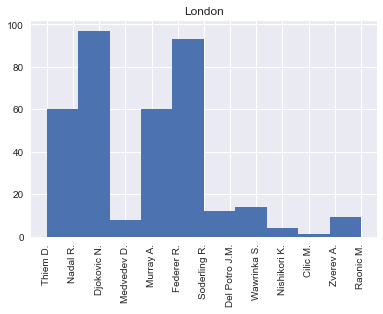

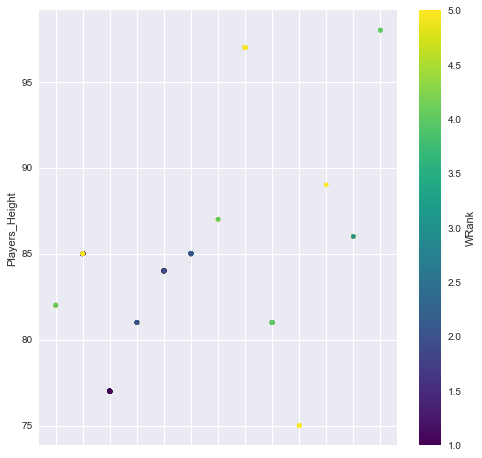

AxesSubplot(0.125,0.125;0.775x0.755)


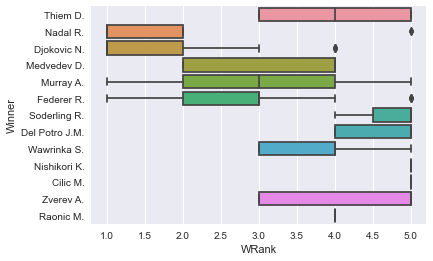

In [186]:
#### Winners list who played in london with height greater then 175 and with weight above 70 having rank less then 6
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

Insight = Tournament_Winner[['row_order','pl1_height','pl1_weight']]
Insight2 = Tournament_Won[['row_order','Winner','WRank']]
Insight3 = tournament[['row_order','Location']]


wholedata = pd.merge(pd.merge(Insight,Insight2,on='row_order'),Insight3,on='row_order') 
idx = np.where((wholedata['pl1_height']> 175.0 ) & (wholedata['pl1_weight'] > 70.0) & (wholedata['Location'] == 'London') & (wholedata['WRank'] <= 5.0))

values = wholedata.loc[idx]
values = pd.DataFrame(values)

print(values)


lon_win = values.hist(column='Winner',by='Location')
print(lon_win)

values.plot.scatter(x='Winner', y='pl1_weight', c='WRank', colormap="viridis", figsize=[8,8])
plt.xlabel("Winners")
plt.ylabel("Players_Height")
plt.show()

win_rank = sns.boxplot(data = values,x = 'WRank',y = 'Winner')
print(win_rank,)

# pandas_gbq.to_gbq(values, destination_table = "training_dataset.Insight_table", project_id=CREDS.project_id, credentials = CREDS,if_exists='replace')
